## 1. Dataset
-   심장마비 데이터셋
-   Predictors
    -   `Age` : 나이
    -   `Sex` : 성별 (M - 남자, F - 여자)
    -   `ChestPainType` : 가슴통증 타입 (TA: 전형적 가슴통증 (Typical Angina), ATA: 비전형적 가슴통증 (Atypical Angina), 
         NAP: 비심인성 가슴통증 (Non-Anginal Pain), ASY: 무증상/가슴통증없음 (Asymptomatic))
    -   `RestingBP` : 혈압
    -   `Cholesterol` : 혈청 콜레스테롤
    -   `FastingBS` : 공복 혈당 
    -   `RestingECG` : 심전도
    -   `MaxHR` : 최대 심장박동 수
    -   `ExerciseAngina` : 운동 유도 협심증
    -   `Oldpeak` :    노약 = 운동에 의해 유발되는 St 우울증
    -   `ST_Slope` :    ST 세그먼트의 기울기
-   Target
    -   `HeartDisease` : 0 - , 1 - 

## 1.1 Load dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

In [4]:
pwd

'C:\\Users\\user\\Documents\\Data mining'

In [5]:
df = pd.read_csv('heart_failure.csv')
df.head()

Age Sex ChestPainType  RestingBP    x  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140  289          0     Normal    172   
1   49   F           NAP        160  180          0     Normal    156   
2   37   M           ATA        130  283          0         ST     98   
3   48   F           ASY        138  214          0     Normal    108   
4   54   M           NAP        150  195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [6]:
df.rename(columns={'x': 'Cholesterol'}, inplace=True)

In [7]:
df.shape

(918, 12)

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [11]:
# check target variable distribution

df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [12]:
# check unique data
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
# check duplicated data
df.duplicated().sum()
# no duplicated data

0

In [14]:
# check missing data
df.isnull().sum()
# no null value 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 2. EDA

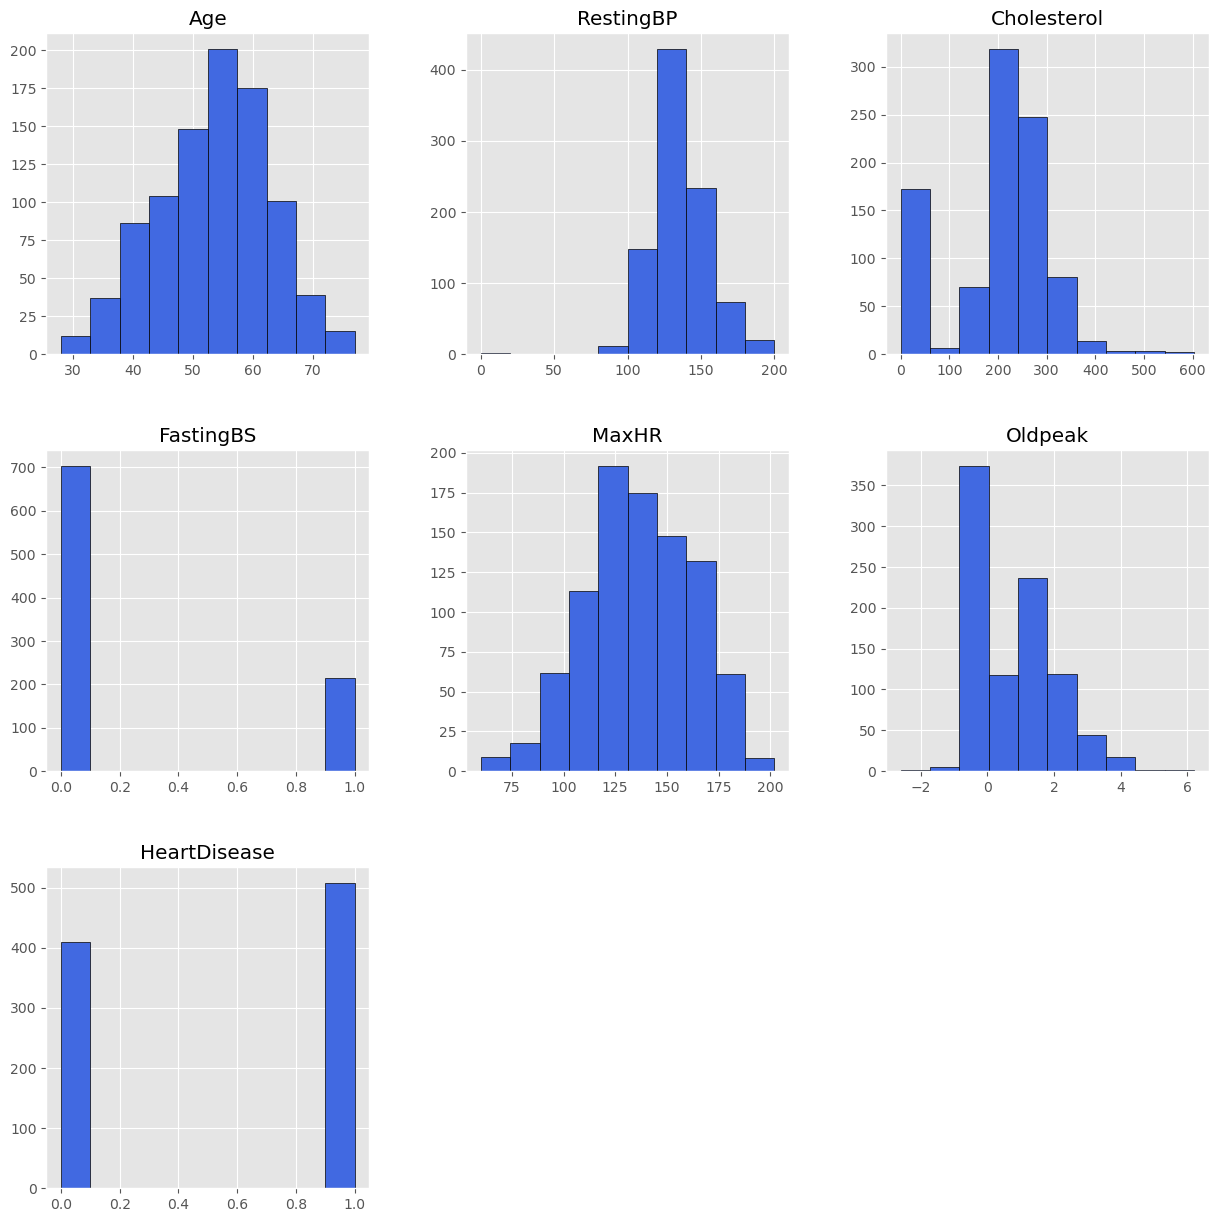

In [15]:
#histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

In [16]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

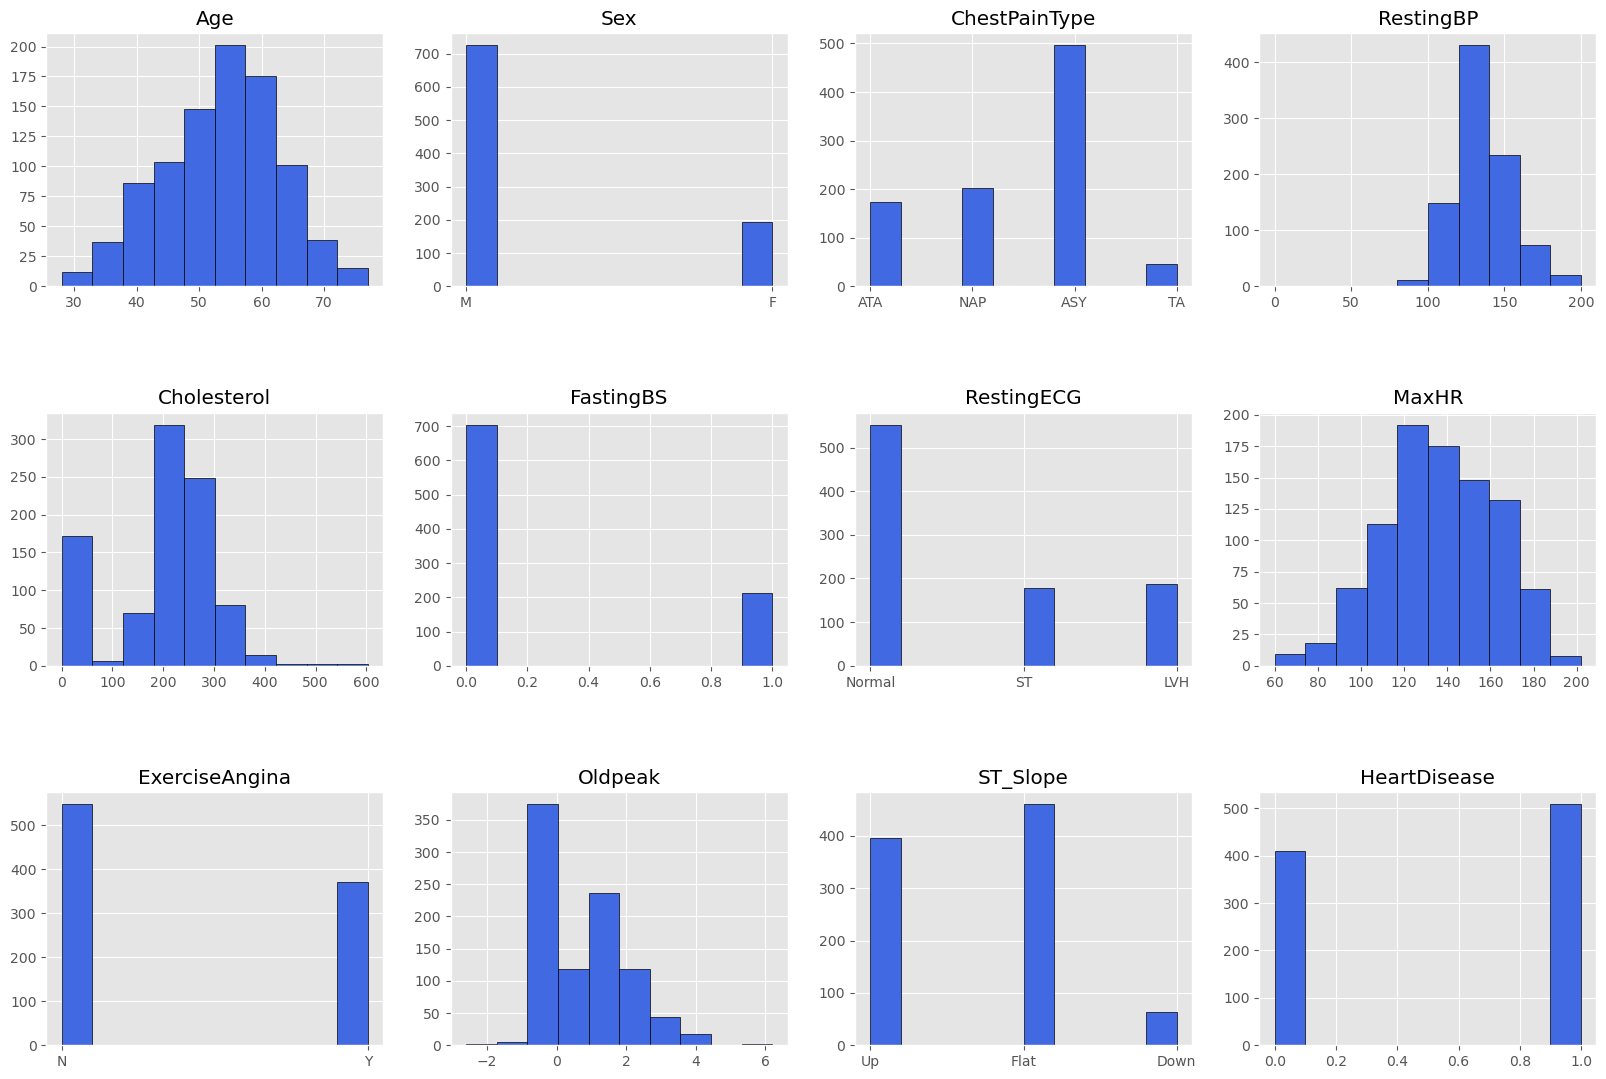

In [17]:
plt.figure(figsize=(20,23))
for i in range(len(df.columns)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.title(df.columns[i])
    plt.xticks()
    plt.hist(df[df.columns[i]], edgecolor = 'black', color='royalblue')
    
plt.show()

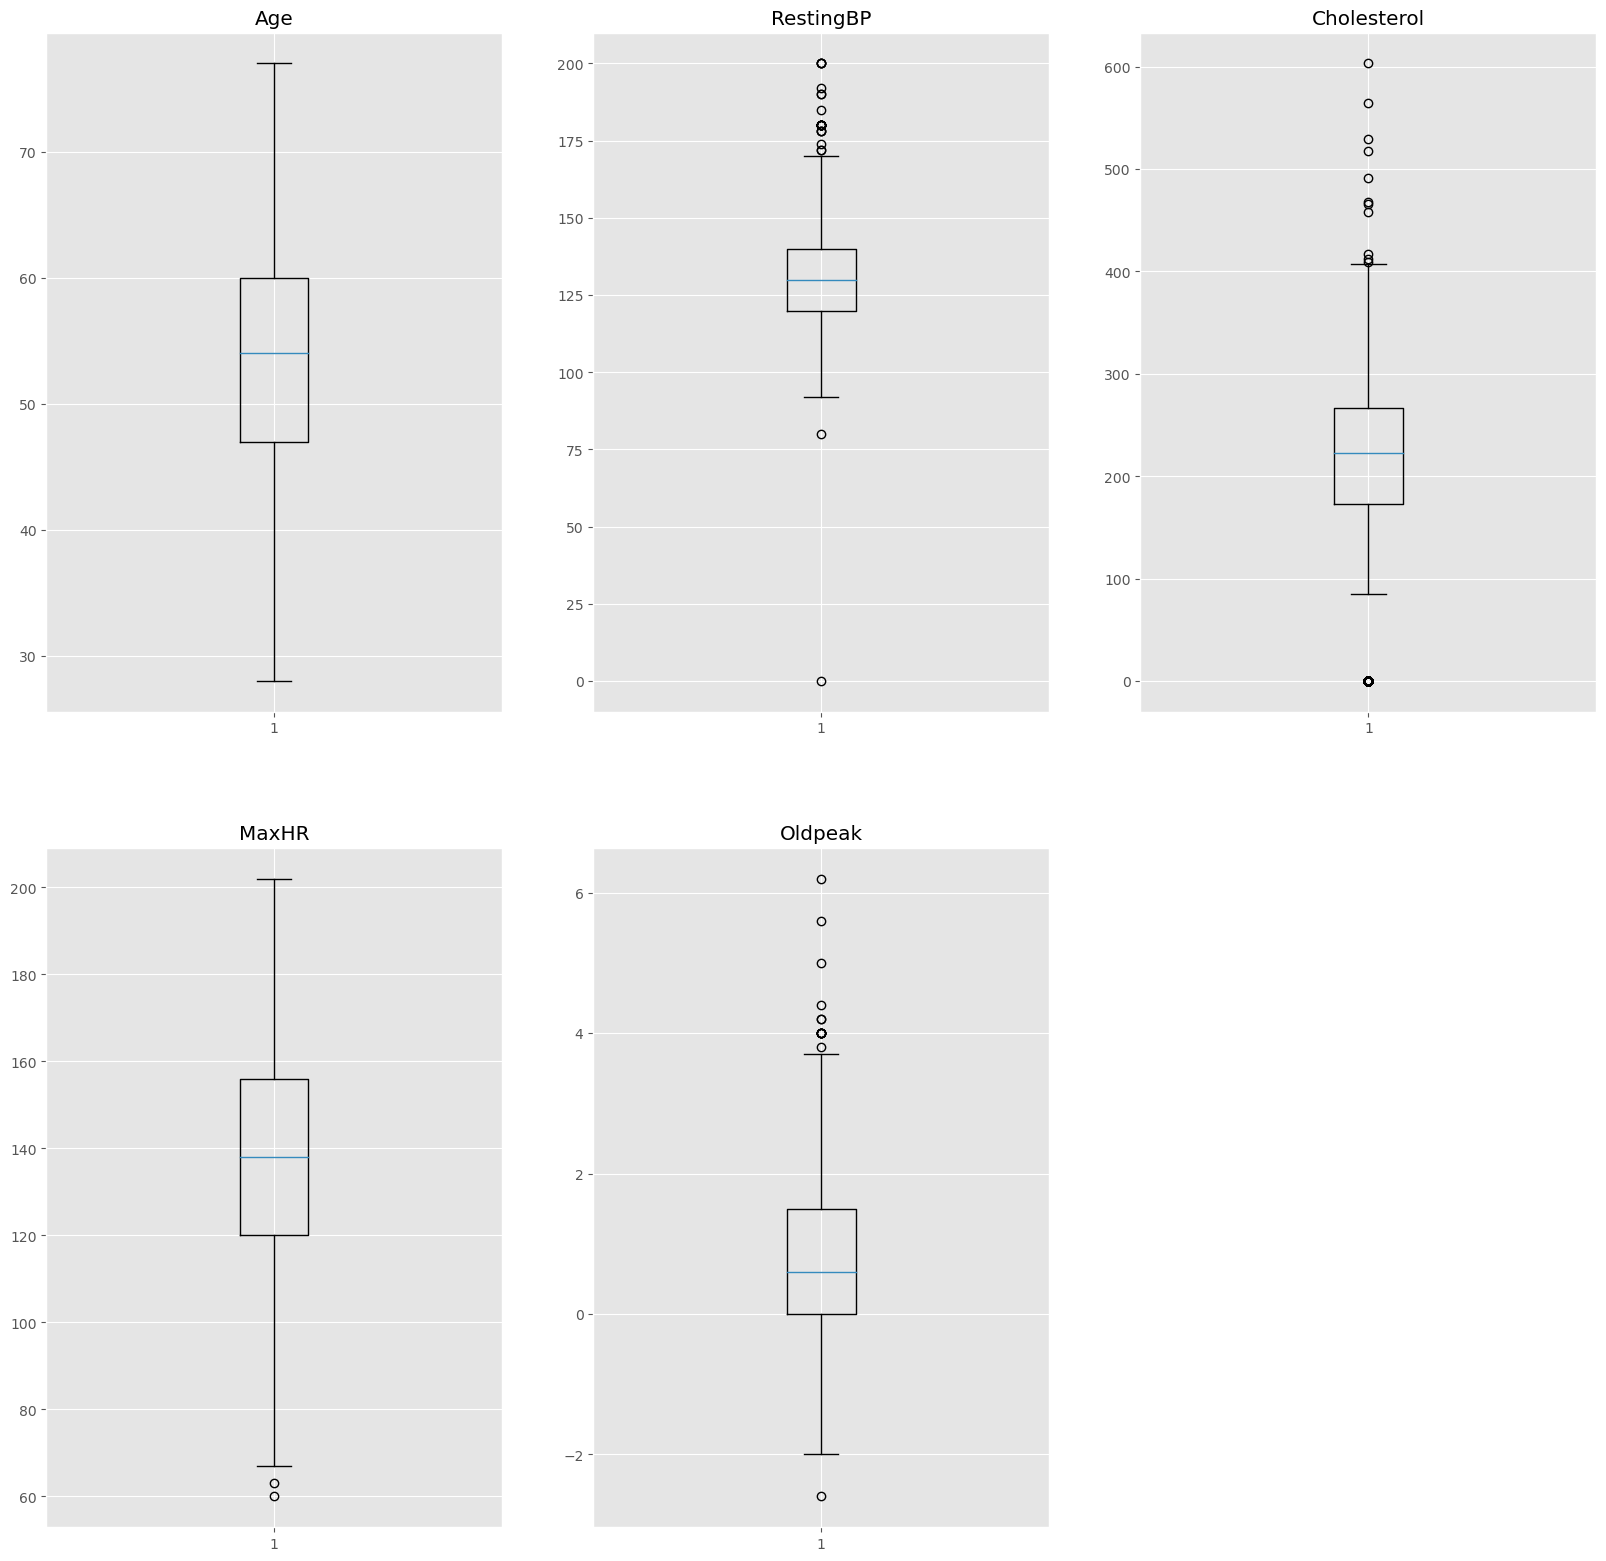

In [18]:
# boxplot
plt.figure(figsize=(20,30))
df_numerical = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
for i in range(len(df_numerical.columns)):
    plt.subplot(3,3,i+1)
    plt.title(df_numerical.columns[i])
    plt.boxplot(df_numerical[df_numerical.columns[i]])
    
plt.show()

In [19]:
# drop target variable for separate analysis
df3= df.drop('HeartDisease',axis=1)

In [20]:
# relative frequency graph of numerical variables

Text(0.5, 1.0, 'Age / 나이')

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


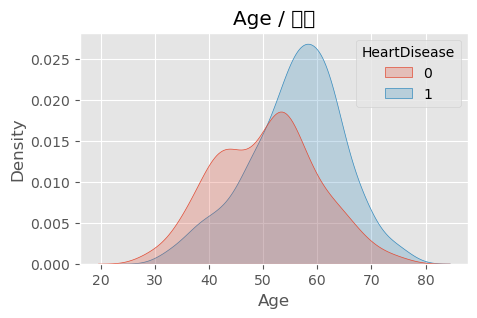

In [21]:
# comparing age distribution between patients with/without heart disease

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['Age'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('Age / 나이')

Text(0.5, 1.0, 'RestingBP / ㅓ눠푼ㅍ;니ㅡㅁ;')

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12627 (\N{HANGUL LETTER EO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45600 (\N{HANGUL SYLLABLE NWEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54396 (\N{HANGUL SYLLABLE PUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12621 (\N{HANGUL LETTER PHIEUPH}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12641 (\N{HANGUL LETTER EU}) missing from current font.
  

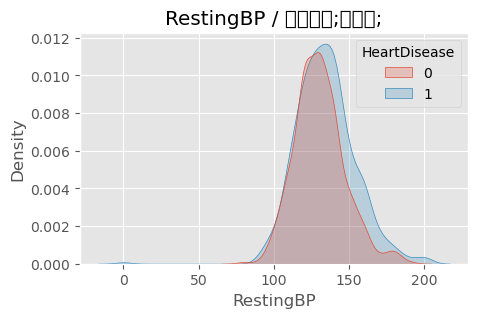

In [22]:
# compare blood pressure distribution

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['RestingBP'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('RestingBP / 혈압')

Text(0.5, 1.0, 'Cholesterol')

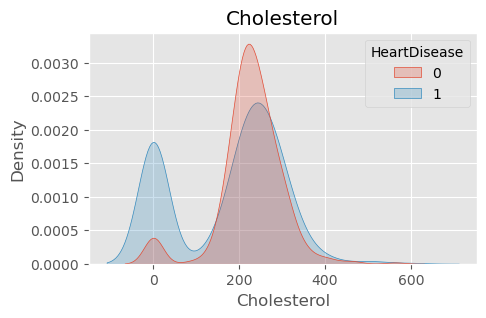

In [23]:
# compare cholesterol levels

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['Cholesterol'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('Cholesterol')

Text(0.5, 1.0, 'FastingBS')

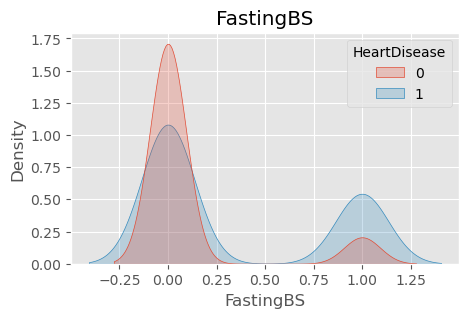

In [24]:
# compare fasting blood sugar

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['FastingBS'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('FastingBS')

Text(0.5, 1.0, 'MaxHR')

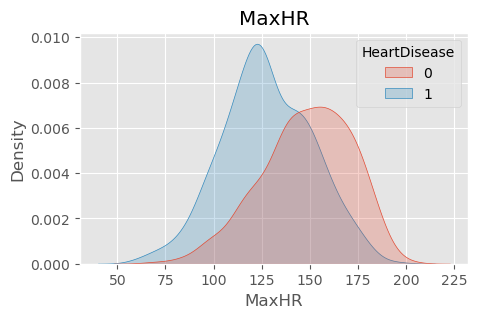

In [25]:
# compare maximum heart rate achieved

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['MaxHR'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('MaxHR')

Text(0.5, 1.0, 'OldPeak')

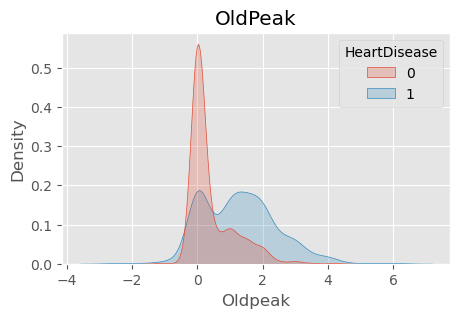

In [26]:
# compare ST depression values

fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df, x=df['Oldpeak'], hue='HeartDisease', ax=ax, fill=True)
ax.set_title('OldPeak')

In [27]:
# Relative frequency graph of categorical variables

<Axes: xlabel='Sex'>

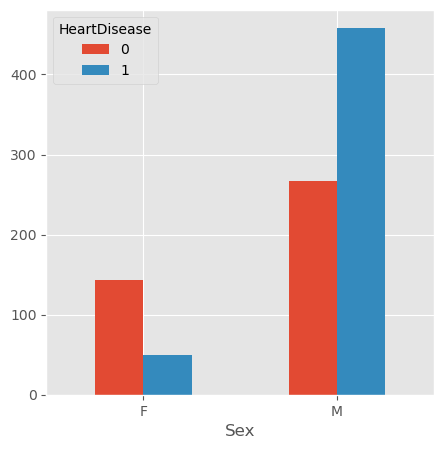

In [28]:
# compare heart disease prevalence by gender

catvar1 = pd.crosstab(df.Sex, df.HeartDisease)
catvar1.plot(kind='bar', rot=0)

<Axes: xlabel='ChestPainType'>

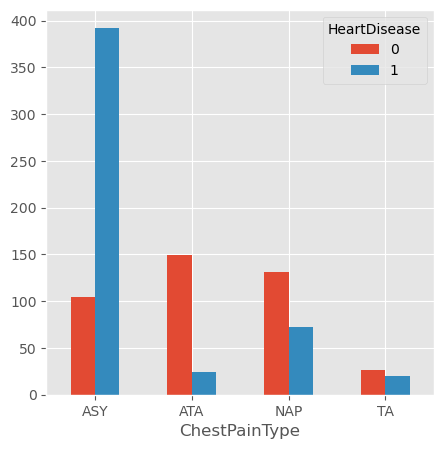

In [29]:
# compare by chest pain type

catvar2 = pd.crosstab(df.ChestPainType, df.HeartDisease)
catvar2.plot(kind='bar', rot=0)

<Axes: xlabel='RestingECG'>

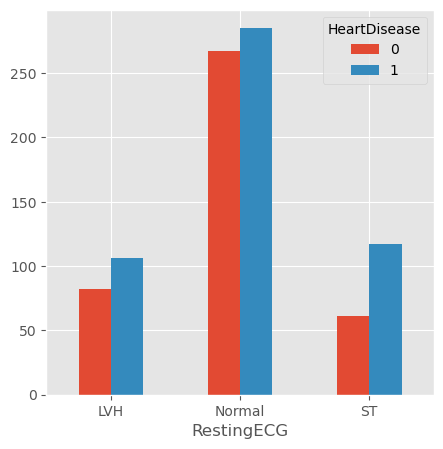

In [30]:
# compare by resting ECG results

catvar3 = pd.crosstab(df.RestingECG, df.HeartDisease)
catvar3.plot(kind='bar', rot=0)

<Axes: xlabel='ExerciseAngina'>

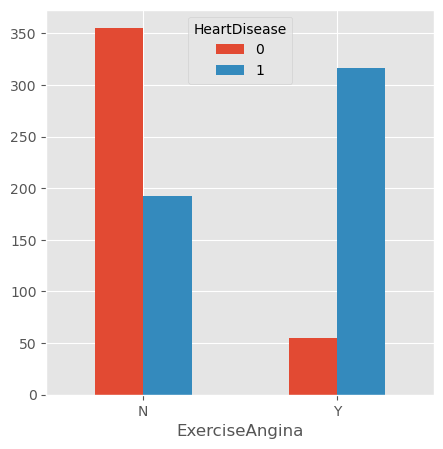

In [31]:
# compare by exercise-induced angina

catvar4 = pd.crosstab(df.ExerciseAngina, df.HeartDisease)
catvar4.plot(kind='bar', rot=0)

<Axes: xlabel='ST_Slope'>

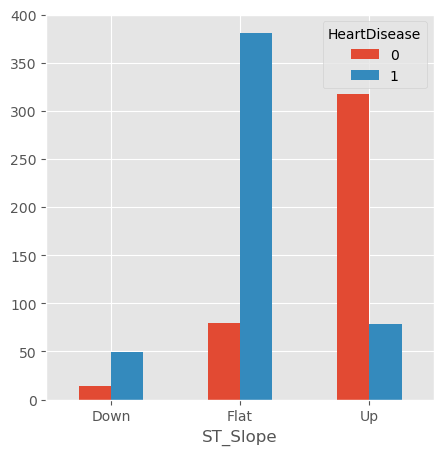

In [32]:
# compare by ST segment slope

catvar5 = pd.crosstab(df.ST_Slope, df.HeartDisease)
catvar5.plot(kind='bar', rot=0)

### 2.2 Correlation heatmap

-   상관관계 히트맵
    -   전체 dataset, y=1인 dataset, y=0인 dataset

In [33]:
# only numerical columns

df_num = df.select_dtypes(exclude=object)

In [34]:
target_name = 'HeartDisease'
df_numy1 = df_num[df_num[target_name]==1]
df_numy0 = df_num[df_num[target_name]==0]

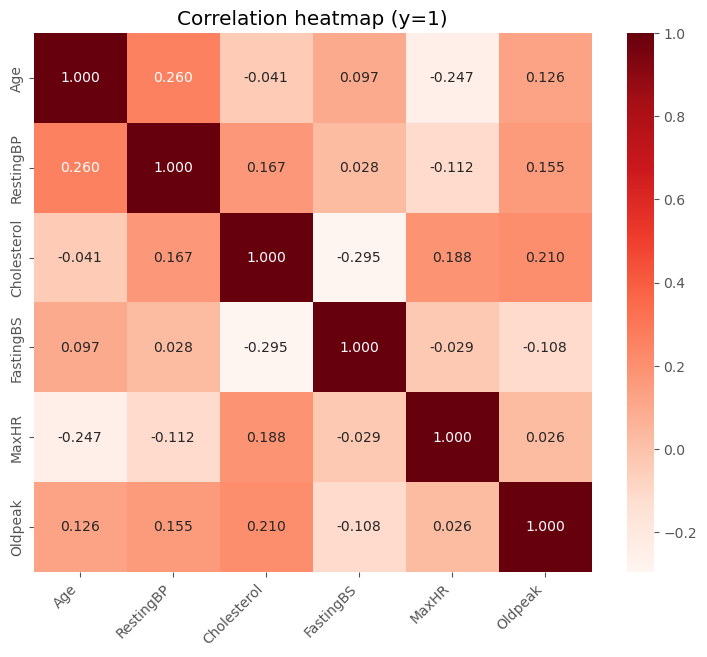

In [36]:
# correlation heatmap for patients with heart disease

plt.figure(figsize = (9,7))
g = sns.heatmap(df_numy1.iloc[:,:-1].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=1)')
plt.show()

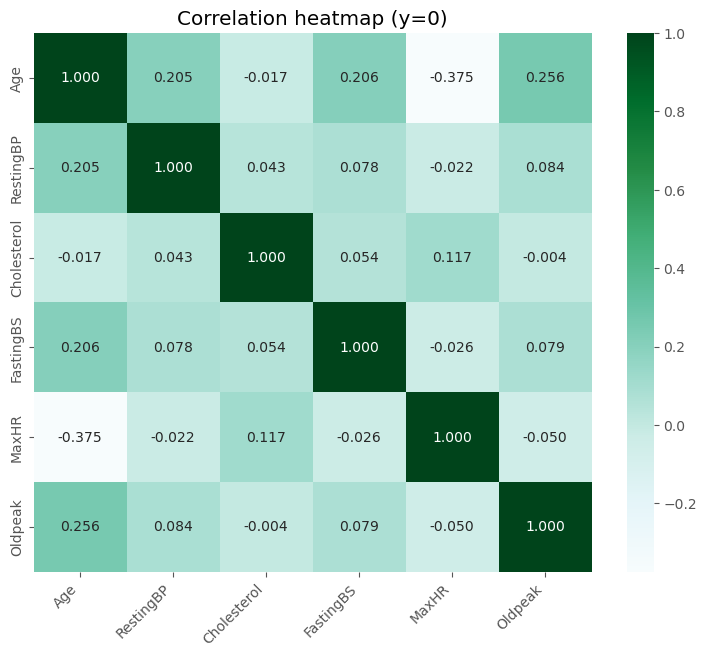

In [38]:
# correlation heatmap for patients without heart disease

plt.figure(figsize = (9,7))
g=sns.heatmap(df_numy0.iloc[:,:-1].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=0)')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


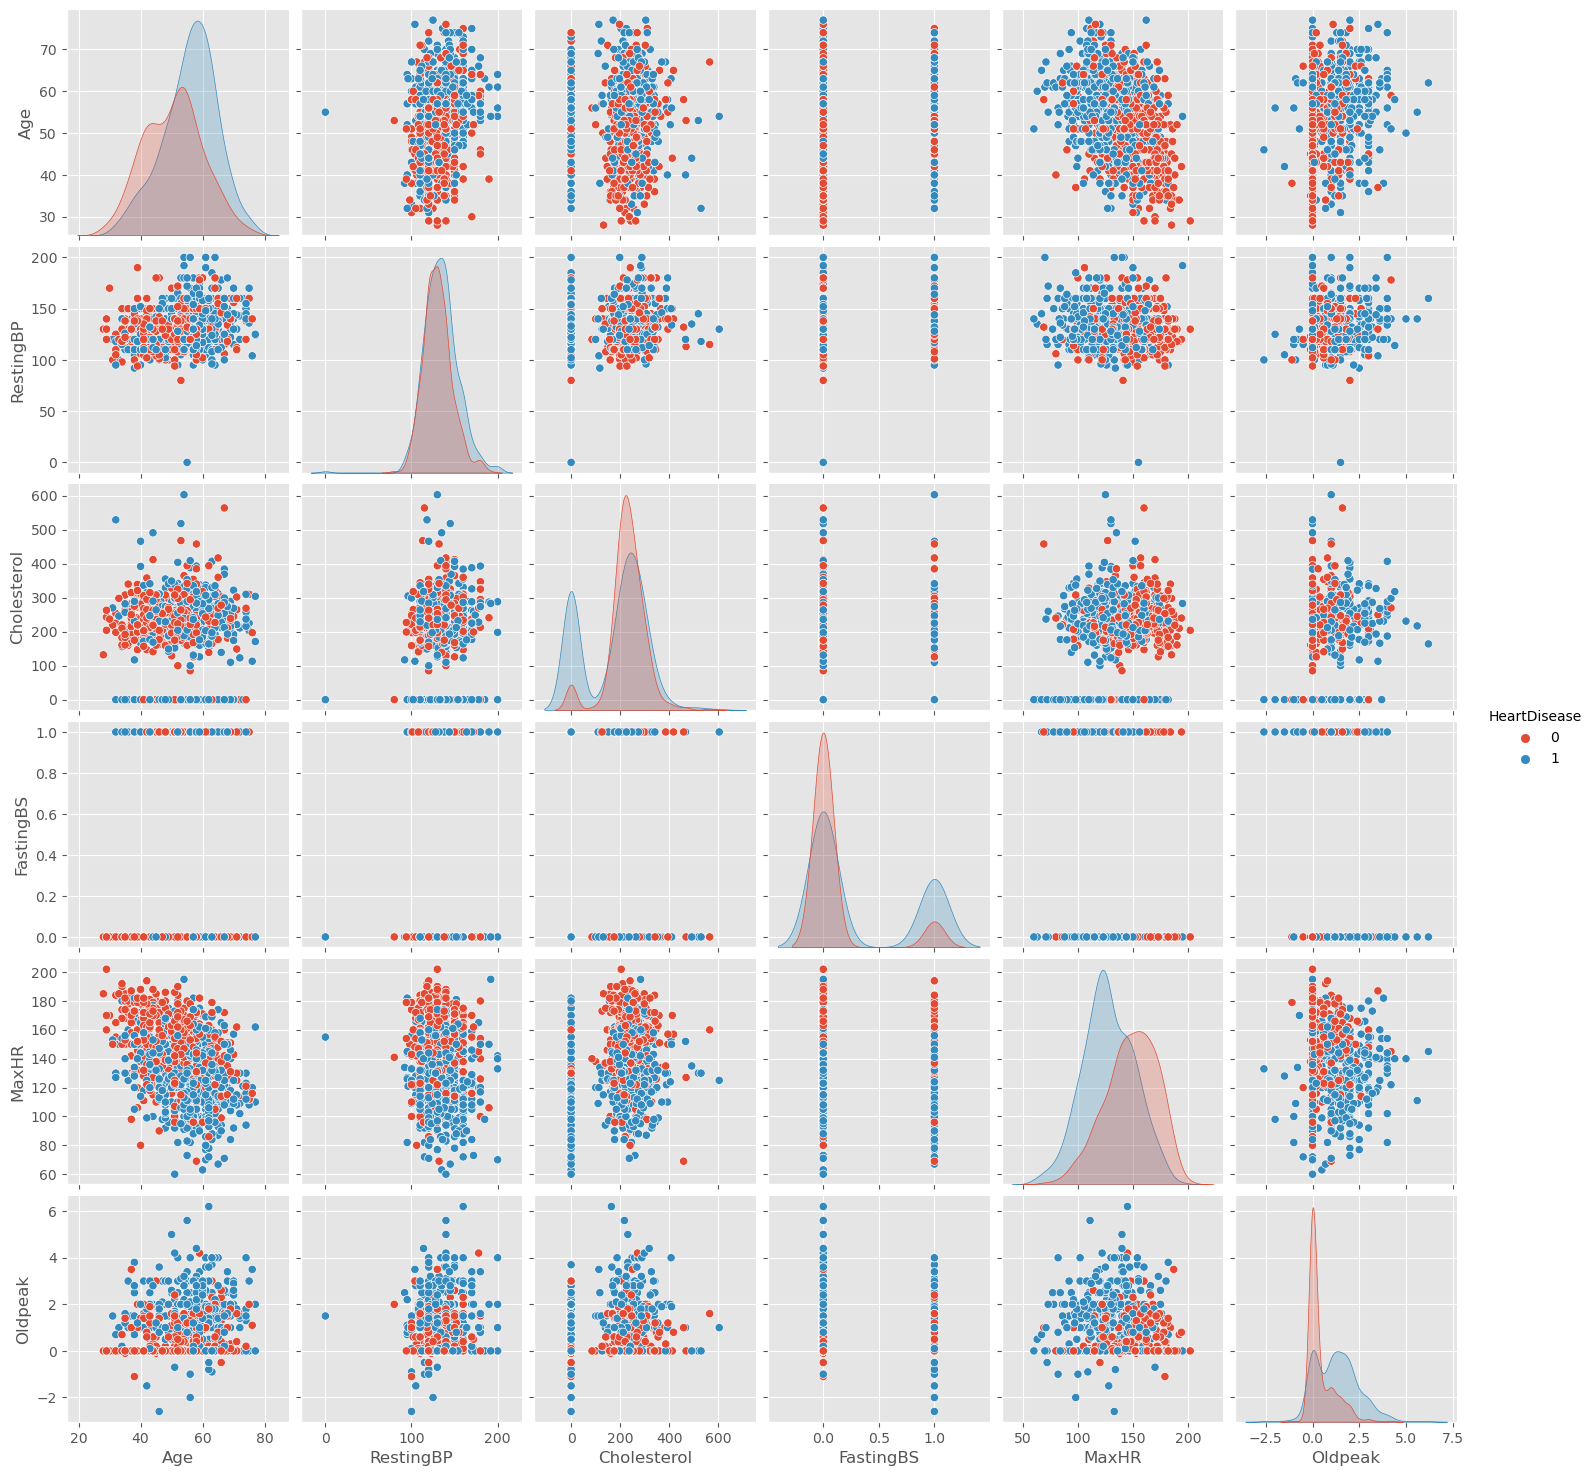

In [39]:
# pairplot

sns.pairplot(df_num, hue = 'HeartDisease')

### 3. Data preprocessing

In [40]:
#categorical variables to numerical variables

In [41]:
#ExerciseAngina의 Y, N 내용을 1,0로 변환
# 1 - 운동을 통해서 발생되는 협심증 있다
# 0 - 운동을 통해서 발생되는 협심증 없다
#협심증 - 심장에 혈액을 공급하는 혈관인 관상 동맥이 경화증으로 좁아져서 생기는 질환
df.replace({'ExerciseAngina': {'Y': 1, 'N': 0}}, inplace=True)

In [42]:
#성별 변수를 1, 0로 변환
# 1 - 남자
# 0 - 여자
df.replace({'Sex': {'M': 1, 'F': 0}}, inplace=True)

In [43]:
#ChestPainType의 내용을 0, 1, 2, 3로 변환
# 0 - ASY 가슴통증 없음
# 1 - NAP 비심인성 가슴통증
# 2 - ATA 비전형적 가슴통증
# 3 - TA 전형적 가슴통증
df.replace({'ChestPainType': {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}}, inplace=True)

In [44]:
#RestingECG의 내용을 0, 1, 2로 변환
# 0 - Normal: 정상
# 1 - ST: ST-T파 이상 상태 - T파가 반전되어 나타남. 또는 0.05크기 이상의 ST분절의 상승
# 2 - LVH: 좌심실비대 상태
df.replace({'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2}}, inplace=True)

In [45]:
#ST_Slope의 내용을 0, 1, 2로 변환
# 0 - Down: 기울기 하강
# 1 - Flat: 기울기 평평
# 2 - Up: 기울기 상승
df.replace({'ST_Slope': {'Down': 0, 'Flat': 1, 'Up': 2}}, inplace=True)

In [46]:
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              2        130          283          0           1   
3   48    0              0        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

### 4. Model

In [47]:
X = df.drop('HeartDisease',axis=1).values
y = df['HeartDisease'].values
columnX = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'x', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
columnY = ['HeartDisease (1)', 'No HeartDisease (0)']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

#### 4.1. Decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10, min_samples_leaf=0.03, random_state=12)

In [50]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=0.03,
                       random_state=12)

In [51]:
DecisionTree_pred = DecisionTree.predict(X_test)

In [52]:
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
class_names = ['Yes', 'No']

In [53]:
# visualization

import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(150,100))
_ = tree.plot_tree(DecisionTree, 
                   feature_names = feature_names,
                   class_names = class_names,
                   max_depth = 5,
                   filled=True,
                  fontsize=100)

In [54]:
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
class_names = ['Yes', 'No']

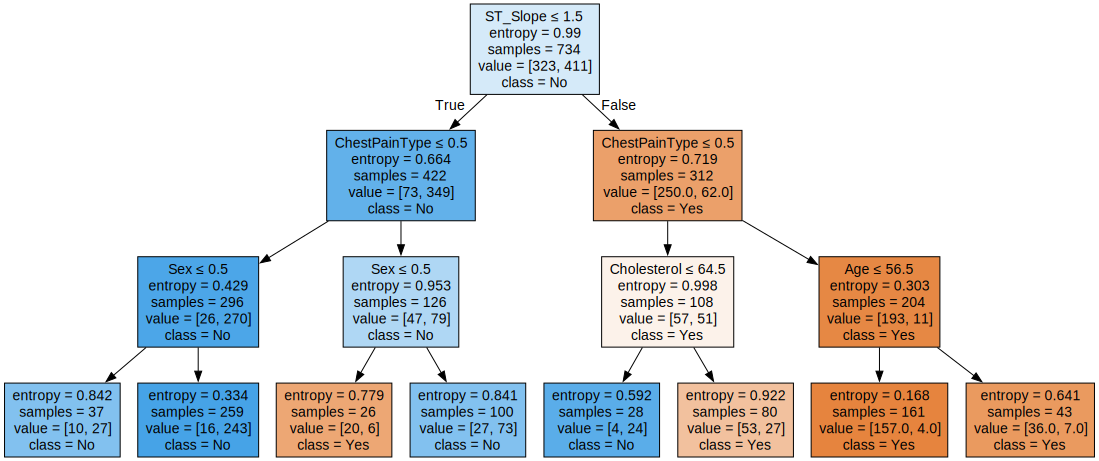

In [55]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=3, random_state=12)
dt.fit(X_train, y_train)

# Visualization
dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=feature_names,
                      class_names=class_names,  
                      filled=True, rounded=False,
                      special_characters=True)  
dtree = graphviz.Source(dot_data)  
dtree

In [56]:
output_file_path = "dt2.jpg"
dtree.render(output_file_path, format='jpg', cleanup=True)

'dt2.jpg.jpg'

In [57]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

train_score = DecisionTree.score(X_train, y_train)
test_score = DecisionTree.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8760217983651226
Test Score: 0.8152173913043478


In [58]:
# DT with GridSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# hyperparameter grid
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

# base model
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)

# perform grid search with 5-fold cross-validation
DecisionTree = GridSearchCV(
    DecisionTree, 
    parameters, 
    cv=5)

DecisionTree.fit(X_train,y_train)
DT_pred = DecisionTree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

train_score = DecisionTree.score(X_train, y_train)
test_score = DecisionTree.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9019073569482289
Test Score: 0.8206521739130435


In [60]:
# evaluate model performance

print(classification_report(y_test, DT_pred))
print(confusion_matrix(y_test, DT_pred))

DTacc = accuracy_score(DT_pred,y_test)
print('Accuracy score: ', DTacc)

print('F1 score: ', f1_score(y_test, DT_pred))

print('roc_auc score: ', roc_auc_score(y_test, DT_pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        87
           1       0.82      0.85      0.83        97

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

[[69 18]
 [15 82]]
Accuracy score:  0.8206521739130435
F1 score:  0.8324873096446701
roc_auc score:  0.8192321365090651


#### 4.2. Logistic Regression

In [61]:
# LR without gridsearchcv
from sklearn.linear_model import LogisticRegression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
LogisticRegression = LogisticRegression(random_state=12)

LogisticRegression.fit(X_train, y_train)
LR_pred = LogisticRegression.predict(X_test)

print(classification_report(y_test, LR_pred))
print(confusion_matrix(y_test, LR_pred))

LRAcc = accuracy_score(LR_pred,y_test)
print('LR accuracy: ', LRAcc)
print('F1 score: ', f1_score(y_test, LR_pred))
print('roc_auc score: ', roc_auc_score(y_test, LR_pred, average = 'weighted')) 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        87
           1       0.83      0.85      0.84        97

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184

[[70 17]
 [15 82]]
LR accuracy:  0.8260869565217391
F1 score:  0.8367346938775511
roc_auc score:  0.8249792629458468


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# LR with gridsearchcv
from sklearn.linear_model import LogisticRegression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
LogisticRegression = LogisticRegression(random_state=12)

LogisticRegression = GridSearchCV(
    LogisticRegression, 
    parameters, 
    cv=5,
    scoring='accuracy')

LogisticRegression.fit(X_train, y_train)
LR_pred = LogisticRegression.predict(X_test)

print(classification_report(y_test, LR_pred))
print(confusion_matrix(y_test, LR_pred))

LRAcc = accuracy_score(LR_pred,y_test)
print('LR accuracy: ', LRAcc)
print('F1 score: ', f1_score(y_test, LR_pred))
print('roc_auc score: ', roc_auc_score(y_test, LR_pred, average = 'weighted'))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        87
           1       0.83      0.85      0.84        97

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184

[[70 17]
 [15 82]]
LR accuracy:  0.8260869565217391
F1 score:  0.8367346938775511
roc_auc score:  0.8249792629458468


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Age'>

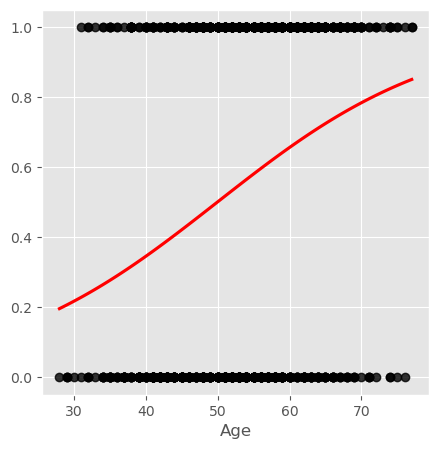

In [63]:
# logistic regression curve for age

sns.regplot(x=df['Age'], y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

#Age-iig solih

#### 4.3. Random forest

In [64]:
# RF without GridSearchCV

from sklearn.ensemble import RandomForestClassifier

parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

RandomForest =  RandomForestClassifier(random_state=12)

In [65]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [66]:
RF_pred = RandomForest.predict(X_test)

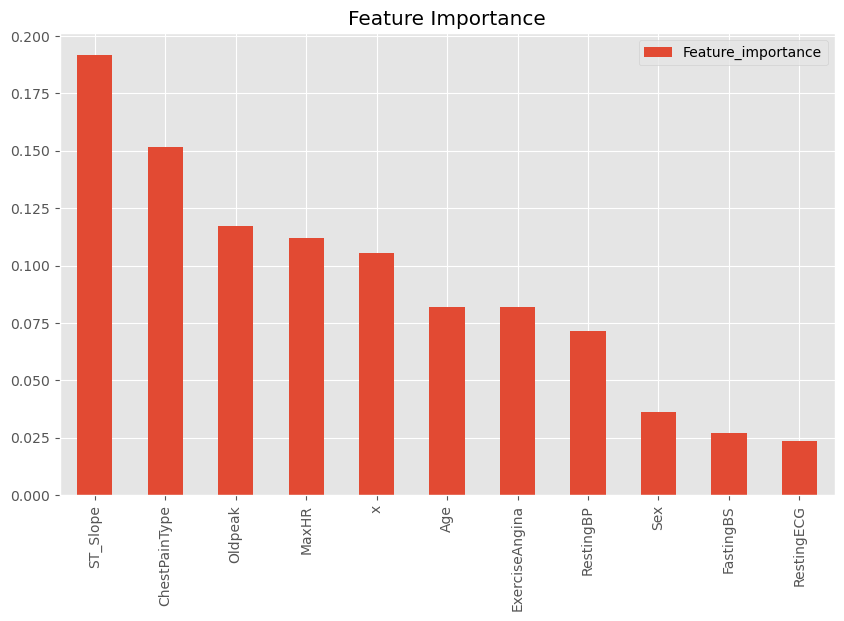

In [67]:
# feature importance analysis

feature_score = pd.DataFrame(RandomForest.feature_importances_, index =columnX,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)
feature_score.plot(kind='bar',figsize=(10,6));
plt.title('Feature Importance');

In [68]:
# evaluating model performance
print(classification_report(y_test, RF_pred))
print(confusion_matrix(y_test, RF_pred))

RFacc = accuracy_score(RF_pred,y_test)
print('LR accuracy: ', RFacc)
print('F1 score: ', f1_score(y_test, RF_pred))
print('roc_auc score: ', roc_auc_score(y_test, RF_pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        87
           1       0.83      0.88      0.85        97

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

[[69 18]
 [12 85]]
LR accuracy:  0.8369565217391305
F1 score:  0.85
roc_auc score:  0.8346960540348383


In [69]:
# RF with GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters1 = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

RandomForest1 =  RandomForestClassifier(random_state=12)

RandomForest1 = GridSearchCV(
    RandomForest1, 
    parameters, 
    cv=5,
)
RandomForest.fit(X_train, y_train)
RF_pred1 = RandomForest.predict(X_test)

print(classification_report(y_test, RF_pred1))
print(confusion_matrix(y_test, RF_pred1))

RFacc1 = accuracy_score(RF_pred1,y_test)
print('RF accuracy: ', RFacc1)
print('F1 score: ', f1_score(y_test, RF_pred1))
print('roc_auc score: ', roc_auc_score(y_test, RF_pred1, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        87
           1       0.83      0.88      0.85        97

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

[[69 18]
 [12 85]]
RF accuracy:  0.8369565217391305
F1 score:  0.85
roc_auc score:  0.8346960540348383


#### 4.4. Gradient boosting

In [70]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
from xgboost import XGBClassifier

parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb = XGBClassifier(tree_method = 'hist', enable_categorical = True, 
                        max_cat_to_onehot = 2, learning_rate = 0.01)

In [72]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=2, max_delta_step=None,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_parallel_tree=None,
              random_state=None, ...)

In [73]:
xgb_pred = xgb.predict(X_test)

In [74]:
# XGBoost without GridSearchCV
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

XGBacc = accuracy_score(xgb_pred,y_test)
print('XGB accuracy: ', XGBacc)
print('F1 score: ', f1_score(y_test, xgb_pred))
print('roc_auc score: ', roc_auc_score(y_test, xgb_pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        87
           1       0.83      0.88      0.85        97

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

[[70 17]
 [12 85]]
XGB accuracy:  0.842391304347826
F1 score:  0.8542713567839196
roc_auc score:  0.8404431804716199


In [75]:
# XGBoost with GridSearchCV
from xgboost import XGBClassifier

parameters_xgb = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb1 = XGBClassifier(tree_method = 'hist', enable_categorical = True, 
                        max_cat_to_onehot = 2, learning_rate = 0.01)

xgb1 = GridSearchCV(
    xgb1, 
    parameters_xgb, 
    cv=5,
    scoring='accuracy',
)
xgb1.fit(X_train, y_train)
xgb_pred1 = xgb1.predict(X_test)

print(classification_report(y_test, xgb_pred1))
print(confusion_matrix(y_test, xgb_pred1))

XGBacc1 = accuracy_score(xgb_pred1,y_test)
print('XGB accuracy: ', XGBacc1)
print('F1 score: ', f1_score(y_test, xgb_pred1))
print('roc_auc score: ', roc_auc_score(y_test, xgb_pred1, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        87
           1       0.83      0.89      0.86        97

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

[[69 18]
 [11 86]]
XGB accuracy:  0.842391304347826
F1 score:  0.8557213930348259
roc_auc score:  0.839850693210096


C:\Users\user\AppData\Local\Temp\ipykernel_15596\3115941023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\user\AppData\Local\Temp\ipykernel_15596\3115941023.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: ylabel='Density'>

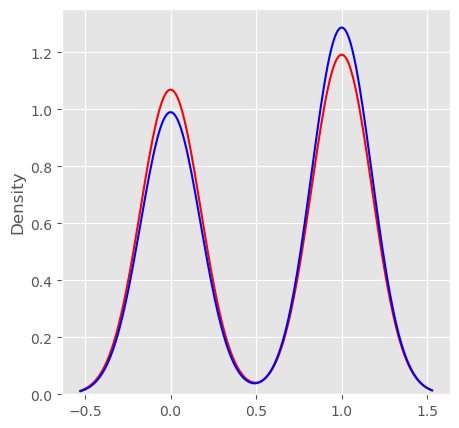

In [76]:
# actual vs predicted distributions

import seaborn as sns
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(xgb_pred1, color='b', label='Predicted Value',hist=False,ax=ax)

#### 4.4. Naive bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

In [78]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [79]:
NB_pred = naive_bayes.predict(X_test)

In [80]:
# evaluating model performance

print(classification_report(y_test, NB_pred))
print(confusion_matrix(y_test, NB_pred))

NBacc = accuracy_score(NB_pred,y_test)
print('NB accuracy: ', NBacc)
print('F1 score: ', f1_score(y_test, NB_pred))
print('roc_auc score: ', roc_auc_score(y_test, NB_pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        87
           1       0.84      0.84      0.84        97

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

[[71 16]
 [16 81]]
NB accuracy:  0.8260869565217391
F1 score:  0.8350515463917526
roc_auc score:  0.8255717502073706


#### 4.5. K-nn

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [82]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
knn_pred = knn.predict(X_test)

In [84]:
# evaluating model performance

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

KNNacc = accuracy_score(knn_pred,y_test)
print('KNN accuracy: ', KNNacc)
print('F1 score: ', f1_score(y_test, knn_pred))
print('roc_auc score: ', roc_auc_score(y_test, knn_pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        87
           1       0.67      0.75      0.71        97

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184

[[51 36]
 [24 73]]
KNN accuracy:  0.6739130434782609
F1 score:  0.7087378640776699
roc_auc score:  0.6693921080696765
